In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
with open("multiBlockHalf16.csv", "r") as file:
    errors = pd.read_csv(file, header = None)
    errors.pop(258)
    errors.pop(257)
    errors.pop(0)
    errors = np.array(errors)
print(errors)
print(errors.shape)

[[  34  252  276 ...    0    0    0]
 [2048 4096 4096 ...    0    0    0]
 [   7    0   20 ...    0    0    0]
 ...
 [4096 4096 2048 ...    0    0    0]
 [  14   14   17 ...    0    0    0]
 [4096 4096 4096 ...    0    0    0]]
(8, 256)


In [9]:
flips = np.zeros((4, 256))
ind = 0
for i in range(0, errors.shape[0], 2):
    flips[ind] = errors[i+1]-errors[i]
    ind += 1
print(flips)
print(flips.shape)

[[2014. 3844. 3820. ...    0.    0.    0.]
 [4089. 2048. 4076. ...    0.    0.    0.]
 [4088. 4086. 2047. ...    0.    0.    0.]
 [4082. 4082. 4079. ...    0.    0.    0.]]
(4, 256)


In [17]:
points10to2048 = []
pointsGreater2048 = []
for i in range(flips.shape[0]):
    for j in range(flips[i].shape[0]):
        if flips[i][j] > 2048:
            pointsGreater2048.append((i, j))
        elif flips[i][j] >= 10:
            points10to2048.append((i, j))
xless, yless = zip(*points10to2048)
xmore, ymore = zip(*pointsGreater2048)

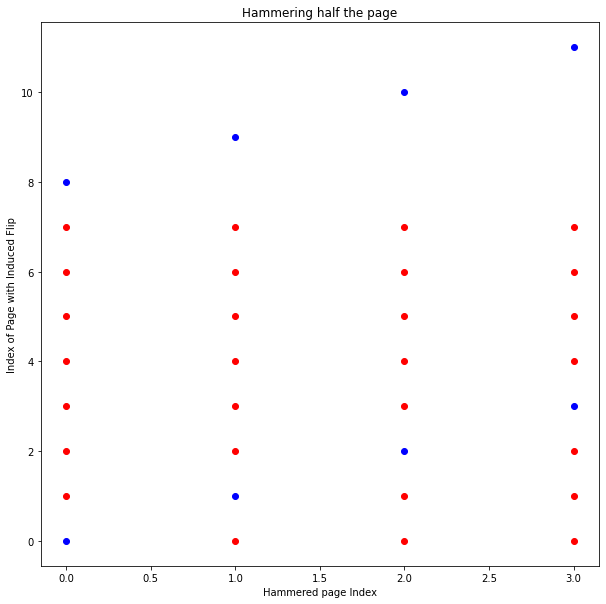

In [18]:
plt.figure(figsize = (10, 10))
plt.scatter(xmore, ymore, color = 'red')
plt.scatter(xless, yless, color = 'blue')
plt.xlabel("Hammered page Index")
plt.ylabel("Index of Page with Induced Flip")
plt.title("Hammering half the page")
plt.show()